In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('dark_background')
%matplotlib inline
import gensim.downloader
from nltk.tokenize import word_tokenize
import sys
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/OddSemester2024/AML/Codes'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


In [4]:
FILE = DATA_DIR + 'Social_Network_Ads.csv'
data = pd.read_csv(FILE)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = data.iloc[:, [2,3]].values
y = data.iloc[:, 4].values

In [6]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Fitting decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
#Predicting
y_pred =  classifier.predict(X_test)

In [10]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]])

In [11]:
from sklearn import metrics
prediction = metrics.accuracy_score(y_test, y_pred)
print("Accuray: ", prediction * 100, "%")

Accuray:  91.0 %


[Text(0.4967948717948718, 0.9615384615384616, 'x[0] <= 0.631\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]'),
 Text(0.26282051282051283, 0.8846153846153846, 'x[1] <= 0.606\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]'),
 Text(0.3798076923076923, 0.9230769230769231, 'True  '),
 Text(0.11538461538461539, 0.8076923076923077, 'x[0] <= -0.161\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]'),
 Text(0.08974358974358974, 0.7307692307692307, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.14102564102564102, 0.7307692307692307, 'x[1] <= -0.06\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(0.11538461538461539, 0.6538461538461539, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.16666666666666666, 0.6538461538461539, 'x[1] <= 0.403\nentropy = 0.771\nsamples = 31\nvalue = [24, 7]'),
 Text(0.14102564102564102, 0.5769230769230769, 'x[1] <= 0.027\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]'),
 Text(0.11538461538461539, 0.5, 'entropy = 0.0\nsamples = 1\nv

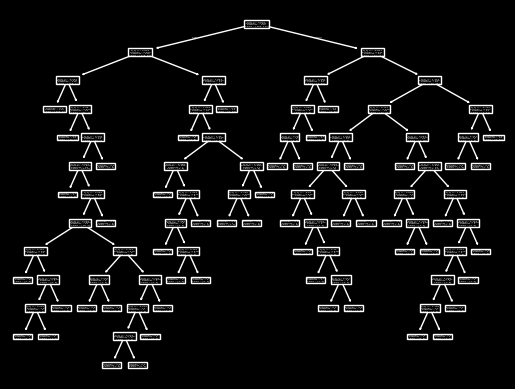

In [12]:
from sklearn import tree
tree.plot_tree(classifier)

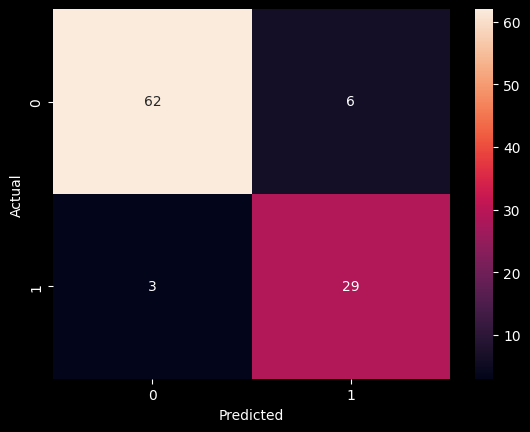

In [19]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

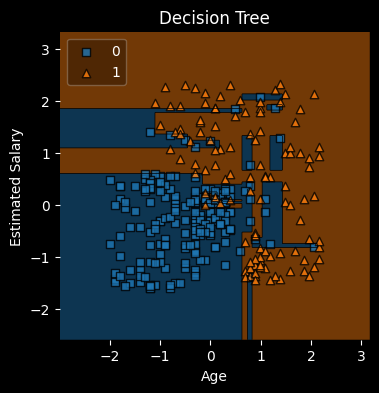

In [17]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4,4))
plot_decision_regions(X_train, y_train, clf=classifier, legend=2)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Decision Tree')
plt.show()
